In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
data = pd.read_excel("python2.xlsx")

In [94]:
data.head()

,Sender_id,Sendername,Senderage,Sender_residence,Sender_joining,sender_gender,transaction_id,sender_id,reciever_id,transaction_date,amount,dist_trx,fraud_flag,reciever_id.1,reciever_name,recievers_age,recievers_state,recievers_date_of_joining,recievers_gender
0,1,barjraj,47,Punjab,30-04-2021,M,583,1,346,27-09-2021,730.2,187.2,0,346,ajahar,59,Punjab,14-04-2021,F
1,20,nahar singh,53,Rajasthan,44504,M,500,20,346,44205,302.8,249.9,0,346,ajahar,59,Punjab,14-04-2021,F
2,799,khimanand,52,Punjab,44472,M,108,799,1,13-10-2021,356.5,497.6,0,1,barjraj,47,Punjab,30-04-2021,M
3,516,devender,24,Rajasthan,24-04-2021,F,123,516,1,44205,14.5,326.8,0,1,barjraj,47,Punjab,30-04-2021,M
4,31,gulshan,54,Haryana,27-04-2021,M,1,31,240,26-09-2021,22.2,248.6,0,240,deepak,28,Rajasthan,44319,M


In [95]:
data.Sender_id.nunique()

978

In [96]:
data.Sender_residence.unique()

array(['Punjab', 'Rajasthan', 'Haryana', 'Delhi', 'Gujarat'], dtype=object)

In [97]:
# Removing unecessary columns

In [98]:
data = data.drop(columns = 'Sender_id')

In [99]:
data = data.drop(columns = 'Sendername')

In [100]:
data = data.drop(columns =['Senderage', 'Sender_residence'])

In [101]:
data = data.drop(columns = ['Sender_joining','sender_gender','sender_id','transaction_id','reciever_id','transaction_date','reciever_id.1','reciever_name'])

In [102]:
data = data.drop(columns = ['recievers_age','recievers_state','recievers_date_of_joining'])

In [103]:
data = data.drop(columns = 'recievers_gender')

In [104]:
data.tail(100)

,amount,dist_trx,fraud_flag
3900,177.4,463.7,0
3901,758.0,163.5,0
3902,691.9,216.0,0
3903,550.8,424.9,0
3904,328.7,386.0,0
...,...,...,...
3995,329.0,13.8,0
3996,550.0,267.2,0
3997,61.0,137.0,0
3998,218.3,489.5,0


In [ ]:
# Distributing data into the parameters and the thing to be predicted.

In [111]:
X = data.drop(columns = 'fraud_flag')

In [112]:
X

,amount,dist_trx
0,730.2,187.2
1,302.8,249.9
2,356.5,497.6
3,14.5,326.8
4,22.2,248.6
...,...,...
3995,329.0,13.8
3996,550.0,267.2
3997,61.0,137.0
3998,218.3,489.5


In [113]:
Y = data['fraud_flag']

In [114]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    0
3999    0
Name: fraud_flag, Length: 4000, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)

In [117]:
X_test

,amount,dist_trx
3132,278.6,316.2
2299,470.9,38.1
224,397.8,110.2
3508,559.6,366.0
3537,183.2,254.3
...,...,...
1856,23.4,340.6
254,90.1,382.8
2453,845.9,414.3
1202,846.2,287.1


In [ ]:
# We are scaling data to provide uniform parameters to train the model.

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()

In [120]:
X_tain_scaled = scaler.fit_transform(X_train)

In [121]:
X_test_scaled = scaler.transform(X_test)

In [123]:
X_tain_scaled

array([[-0.47781562,  0.86637043],
       [ 0.81560042, -0.01171982],
       [-1.30423202, -0.02774845],
       ...,
       [-1.45159635, -0.55042121],
       [ 1.68664122, -1.03824912],
       [-0.02776634, -1.63827746]])

In [124]:
X_test_scaled

array([[-0.7673554 ,  0.44544463],
       [-0.10214036, -1.49262598],
       [-0.35501201, -0.99016323],
       ...,
       [ 1.19508086,  1.1291006 ],
       [ 1.19611864,  0.24264759],
       [ 0.98406621,  1.57163021]])

In [ ]:
# import a logistic regression

In [125]:
from sklearn.linear_model import LogisticRegression

In [130]:
log_reg = LogisticRegression(random_state = 0).fit(X_tain_scaled, Y_train)

In [133]:
log_reg.predict(X_tain_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [134]:
log_reg.score(X_tain_scaled, Y_train)

0.9842857142857143

In [135]:
# Writing error matrix confusion matrix.

In [137]:
from sklearn.metrics import confusion_matrix

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay

In [149]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [150]:
Y_pred = classifier.predict(X_test)

Confusion Matrix :


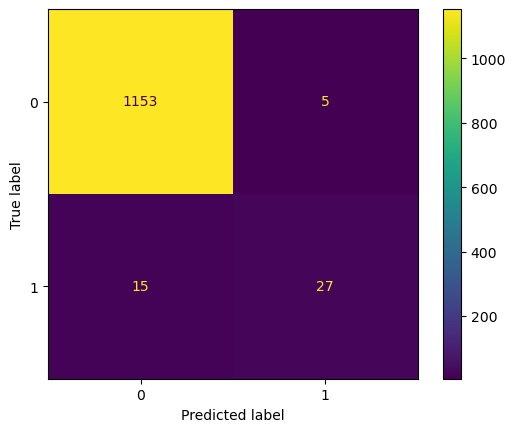

In [151]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
print ("Confusion Matrix :")
plt.show()